In [28]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad,LayerCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50,vgg16
import torchvision.transforms as transforms
import torch
import cv2
from matplotlib import pyplot as plt

In [2]:
model = vgg16(pretrained=True)
target_layers = [model.features[-1]]

In [3]:
model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [4]:
image_cv2=cv2.imread('both.png')
transform_cv2 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])
input_tensor_=transform_cv2(image_cv2)

In [5]:
input_tensor_.shape

torch.Size([3, 224, 224])

In [6]:
input_tensor=input_tensor_.unsqueeze(0)

In [7]:
input_tensor.shape

torch.Size([1, 3, 224, 224])

# Grad CAM

In [8]:
grad_cam = GradCAM(model=model, target_layers=target_layers)

In [9]:
targets = [ClassifierOutputTarget(281)]

In [10]:
grayscale_gradcam = grad_cam(input_tensor=input_tensor, targets=targets)

In [11]:
grayscale_gradcam.shape

(1, 224, 224)

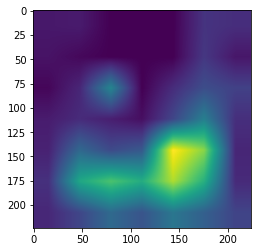

In [12]:
plt.imshow(grayscale_gradcam[0])

In [13]:
input_tensor_.permute(1,2,0).shape

torch.Size([224, 224, 3])

In [14]:
rgb_img=image_cv2/255

In [15]:
grayscale_gradcam_ = grayscale_gradcam[0, :]
visualization_gradcam = show_cam_on_image(rgb_img, grayscale_gradcam_, use_rgb=True)

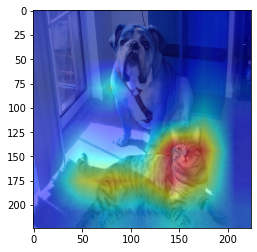

In [16]:
plt.imshow(visualization_gradcam)

# Score Cam

In [60]:
target_layers_sc = [model.features[-3]]

In [61]:
score_cam = ScoreCAM(model=model, target_layers=target_layers_sc)

In [ ]:
targets_sc = [ClassifierOutputTarget(254)]

In [62]:
grayscale_scorecam = score_cam(input_tensor=input_tensor, targets=targets_sc)

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [01:22<00:00,  2.58s/it]


In [63]:
grayscale_scorecam_ = grayscale_scorecam[0, :]
visualization_scorecam = show_cam_on_image(rgb_img, grayscale_scorecam_, use_rgb=True)

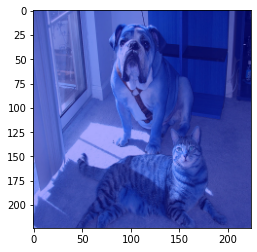

In [64]:
plt.imshow(visualization_scorecam)

# Layer CAM

In [54]:
target_layers_Lc = [model.features[-1]]

In [55]:
layer_cam = LayerCAM(model=model, target_layers=target_layers_Lc)

In [56]:
targets_Lc = [ClassifierOutputTarget(254)]

In [57]:
grayscale_layercam = layer_cam(input_tensor=input_tensor, targets=targets_Lc)

In [58]:
grayscale_layercam_ = grayscale_layercam[0, :]
visualization_layercam = show_cam_on_image(rgb_img, grayscale_layercam_, use_rgb=True)

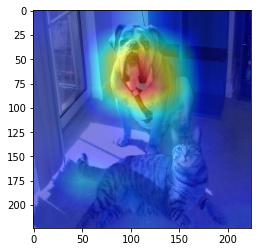

In [59]:
plt.imshow(visualization_layercam)